# Bibliotecas

In [64]:
import torch
from torchvision.transforms import v2
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

sys.path.append("/home/lucas/Image-Denoising/")

import cv2
from PIL import Image
from src.noises import add_noise

# 1. Open dataframe

In [21]:
path = "/home/lucas/datasets/dataframe_v1.csv"
df = pd.read_csv(path)

In [22]:
train = df[df["split"] == 'train']
test = df[df["split"] == 'test']
val = df[df["split"] == 'val']

# 2. Transform functions

In [70]:
transform = v2.Compose([
    #v2.Resize((28, 28)),       # Resize the image to 256x256 pixels
    v2.ToTensor(),            # Convert the image to a PyTorch tensor
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
    #v2.Normalize(mean=[0.485], std=[0.229])  # Normalize the image
])

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [54]:
class AddNoise(torch.nn.Module):
    def forward(self, img, noise,**kwargs):
        noisy_image = add_noise(img, noise_type=noise,**kwargs)

        return Image.fromarray(noisy_image)

# 3. Dataset object

In [71]:
class CustomImageDataset(Dataset):
    def __init__(self, dataframe:pd.DataFrame, transform:v2.Compose, noise_transform:v2.Compose):
        self.dataframe = dataframe
        self.transform = transform
        self.noise_transform = noise_transform

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self, idx):
        
        path,_,_,noise,_ = self.dataframe.iloc[idx]
        
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        noise_img = img.copy()
        noise_img = self.noise_transform(noise_img,noise_type)
        
        img = self.transform(img)
        noise_img = self.transform(noise_img)
   
        return img, noise_img

In [72]:
noise = AddNoise()

In [73]:
train_dataset = CustomImageDataset(train,transform,noise)

In [74]:
img, noise_img = train_dataset.__getitem__(82)

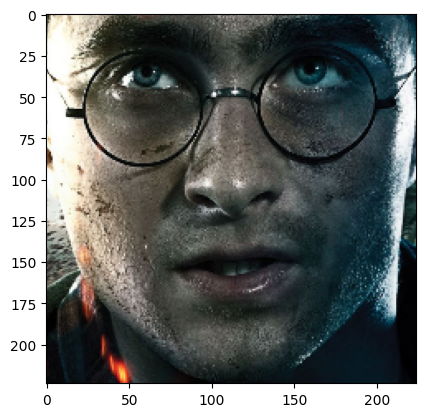

In [76]:
plt.imshow(img.permute(1,2,0))